In [ ]:
# import torch
# import torch.nn as nn
# # 1. Simulate a Khmer Image (Batch Size 1, GrayScale 1, Height 32, Width 128)
# # We use 32x128 because that's a standard size for text line images.
# dummy_image = torch.randn(1, 1, 32, 128)
# print(f"1. Input Image shape: {dummy_image.shape}")

# # 2. Simulate a CNN (Features)
# # Imagine this CNN reduces height by 32x (to 1) and width by 4x (to 32)
# # and produces 256 feature maps.
# cnn_output = torch.randn(1, 256, 1, 32) 
# print(f"2. CNN Output shape: {cnn_output.shape} (Batch, Channels, Height, Width)")

# # 3. The "Permute & Squeeze" (Crucial for OCR)
# # We remove Height (since it's 1) and swap Width to be the "Sequence Length"
# sequence = cnn_output.squeeze(2) # Remove Height: (1, 256, 32)
# sequence = sequence.permute(2, 0, 1) # Swap to (Width, Batch, Channels)
# print(f"3. Sequence shape:    {sequence.shape}   (Sequence_Length, Batch, Features)")

# print("\nSUCCESS: You can now see how an Image becomes a Sequence!")


1. Input Image shape: torch.Size([1, 1, 32, 128])
2. CNN Output shape: torch.Size([1, 256, 1, 32]) (Batch, Channels, Height, Width)
3. Sequence shape:    torch.Size([32, 1, 256])   (Sequence_Length, Batch, Features)

SUCCESS: You can now see how an Image becomes a Sequence!


In [5]:
# try to understand 
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


**Input Image**

In [6]:
dummy_image = torch.randn(1,1,32,128)

# Creates a simulated grayscale image: 1 batch × 1 channel × 32 height × 128 width
# This represents a single line of Khmer texta

Text(0.5, 1.0, 'random dummy image')

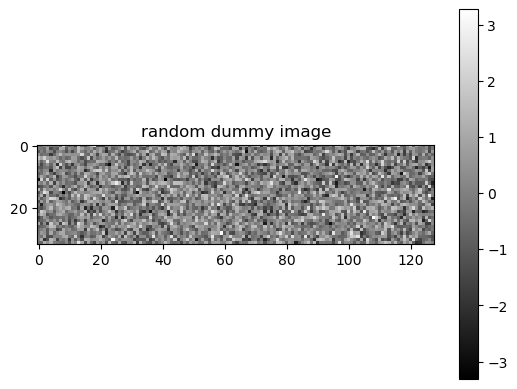

In [9]:
# Display the image created:
plt.imshow(dummy_image.squeeze(),cmap='gray')
plt.colorbar()
plt.title('random dummy image')

**CNN Output (Line 12)**

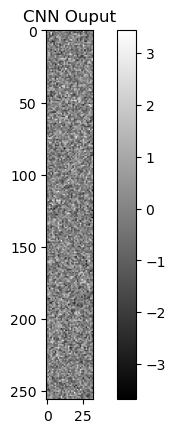

In [13]:
# original: dummy_image = torch.randn(1,     1,       32,     128)
#                                   batch  chanel   height   width

cnn_output = torch.randn(1,256,1,32)
# Extracts 256 feature channels (patterns like edges, curves)
# Reduces height to 1 (compresses vertical info)
# Reduces width to 32 (from 128, so 4× reduction)
plt.imshow(cnn_output.squeeze(),cmap='gray')
plt.colorbar()
plt.title('CNN Ouput')
plt.show()

**Transform to Sequence**

In [14]:
sequence = cnn_output.squeeze(2)     # (1, 256, 32)
sequence = sequence.permute(2,0,1)   # (32, 1, 256)
# This is the key transformation for OCR:

# .squeeze(2): Removes the height dimension (now 1) → shape becomes (batch=1, features=256, width=32)
# .permute(2, 0, 1): Rearranges dimensions to (width=32, batch=1, features=256)

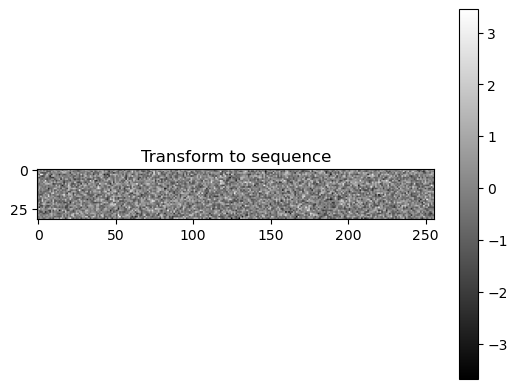

In [15]:
plt.imshow(sequence.squeeze(),cmap='gray')
plt.colorbar()
plt.title('Transform to sequence')
plt.show()

Why This Matters

The final shape (32, 1, 256) means:

32 time steps (positions along the text line)

Each step has 256 features

This format feeds into RNN/Transformer layers that read the "sequence" of features left-to-right to recognize characters